<a href="https://colab.research.google.com/github/Daniel-Oduntan/FDSfE_DOduntan/blob/main/HW5/Copy_of_Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multiple Linear Regression**

---

###Data

The data used in this assignment contains a cleaned and curated version of the market real estate valuations collected from Sindian Dist., New Taipei City, Taiwan, by Prof. I-Cheng Yeh, Department of Civil Engineering, Tamkang University, Taiwan.

The features in the data are the following:

* ```transaction_date```: the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
* ```house_age```: the house age (unit: year)
* ```distance_nearest_MRT_station```: the distance to the nearest MRT station (unit: meter)
* ```convenience_stores```: the number of convenience stores in the living circle on foot (integer)

The target is:
* ```house_price_unit_area```house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

---

## HW instructions:

Similar to what was done in class, your task is to do the following:
1.   create a simple regression model that utilizes only one feature: the log10 of ```distance_nearest_MRT_station``` to predict the house price/unit area, and find the model's metrics ($R^2$ and Adjusted-$R^2$), as well as the the coeffient (slope) of the line.

2.   create a multiple regression model that utilizes all features in the dataset to predict the house price/unit area, and find the model's metrics ($R^2$ and Adjusted-$R^2$), as well as the the coeffient for each variable.

--

In [43]:
# -- import libraries here
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt


Read the data file from the class repo which can be found in the folder "data" and is called "Real_estate.csv"

In [ ]:
# -- your code here 
Realestate=pd.read_csv("https://raw.githubusercontent.com/fedhere/FDSfE_FBianco/main/data/Real_estate.csv")

In [ ]:
Realestate

,transaction_date,house_age,distance_nearest_MRT_station,convenience_stores,house_price_unit_area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1
...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,15.4
410,2012.667,5.6,90.45606,9,50.0
411,2013.250,18.8,390.96960,7,40.6
412,2013.000,8.1,104.81010,5,52.5


## Task 1: simple linear regression

create a simple regression model that utilizes only one feature: the log10 of ```distance_nearest_MRT_station``` to predict the house price/unit area, and find the model's metrics ($R^2$ and Adjusted-$R^2$), as well as the the coeffient (slope) of the line.

---


Calculate the log10 of the ```distance_nearest_MRT_station``` column and add it as a new column to the data frame

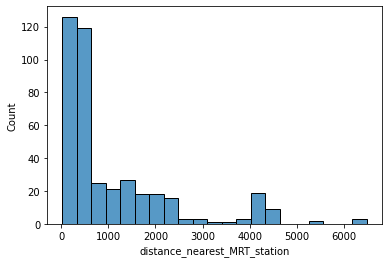

In [12]:
sns.histplot(Realestate['distance_nearest_MRT_station'])

In [23]:
# -- your code here 
dist_transformed = np.array(np.log(Realestate['distance_nearest_MRT_station'])).reshape(-1, 1)


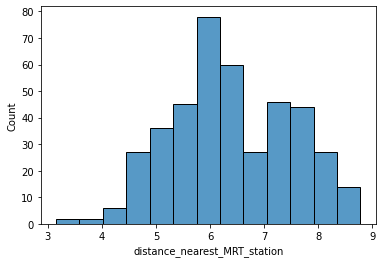

In [14]:
sns.histplot(dist_transformed)

Standardize your feature and target data (setting their mean to 0 and standard deviation to 1)

In [25]:
# -- your code here
scale = StandardScaler()
x = scale.fit_transform(dist_transformed)
y = scale.fit_transform(Realestate[['house_price_unit_area']])


Using the code library of your choice, fit a linear regression model to the data

In [26]:
# -- your code here
model = LinearRegression()
model.fit(x, y)

LinearRegression()

Print both the $R^2$ and Adjusted-$R^2$ of this model 

(+1 bonus point for using the `.format()` method in `print` to show the two values and round them to 3 decimal places)

In [29]:
# -- your code here
r = model.score(x, y)
adjusted_r = 1 - (1-r)*(len(y)-1)/(len(y)-x.shape[1]-1)

print(f"R2 = {round(r, 3)}, Adjusted R2 = {round(adjusted_r, 3)}")

R2 = 0.539, Adjusted R2 = 0.538


Print the coefficient (slope) of the line

In [33]:
# -- your code here
print(f"coefficient = {round(model.coef_[0][0], 3)}")

coefficient = -0.734


From looking at the coefficient, what can you say about the relationship between the feature (the distance to the nearest MRT station) and the target (the house price/unit area)?

The two features are negatively correlated

Plot the actual vs. model predicted values for the house price/unit area for all log10(distance to MRT station) values in the data

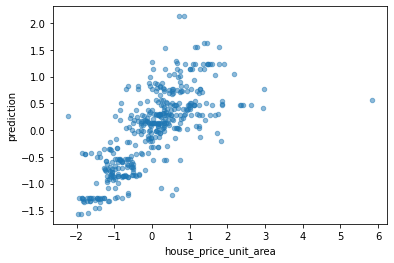

In [ ]:
# -- your code here
sns.scatterplot(y.reshape(1, -1)[0], model.predict(x).reshape(1, -1)[0], alpha=0.6)
plt.xlabel('house_price_unit_area')
plt.ylabel('prediction')
plt.show()

# <mark>WFF</mark> Missing figure caption

## Task 2: multiple linear regression (all variables)

create a multiple regression model that utilizes all features to predict the house price/unit area, and find the model's metrics ($R^2$ and Adjusted-$R^2$), as well as the the coeffient for each variable.

---

Make sure all your features and target columns are standardized, and that you are using all the features in the data frame (also make sure to use ```log10(distance_nearest_MRT_station)``` rather than ```distance_nearest_MRT_station``` as a feature)

In [47]:
# -- your code here
Realestate['distance_nearest_MRT_station'] = np.log(Realestate['distance_nearest_MRT_station'])

Using the code library of your choice, fit a multiple linear regression model to the data

In [48]:
# -- your code here
Realestate[['transaction_date', 'house_age', 'distance_nearest_MRT_station', 'convenience_stores']] = scale.fit_transform(Realestate[['transaction_date', 'house_age', 'distance_nearest_MRT_station', 'convenience_stores']])

Print the coefficients of each of the features

In [56]:
x = Realestate[['transaction_date', 'house_age', 'distance_nearest_MRT_station', 'convenience_stores']]
model.fit(x, y)

In [51]:
coef = model.coef_[0]

In [55]:
# -- your code here
print(f"coefficient for log_dist_MRT = {round(coef[2], 3)}\ncoefficient for convenience_stores = {round(coef[3], 3)}\ncoefficient for transaction_date = {round(coef[0], 3)}\ncoefficient for house_age = {round(coef[1], 3)}")

coefficient for log_dist_MRT = -0.643
coefficient for convenience_stores = 0.137
coefficient for transaction_date = 0.152
coefficient for house_age = -0.177


What can you claim about the relative correlation and influence of each feature on the prediction of the target variable?

The coefficient for log_dist_MRT has a strong negative correlation, the coefficient for convenience_stores has a weak positive correlation, the coefficient for transaction_date has a weak positive correlation, the coefficient for house_age has a weak positive correlation, the coefficient for house_age has a weak negative correlation

Print the $R^2$ of this model

In [57]:
# -- your code here
print(f"r2 = {round(model.score(x, y), 3)}")

r2 = 0.601


Looking only at the $R^2$ scores for this model relative to the previous model in Task 1, would you say the model has improved with the addition of the remaining features or not? and Why?

Print the Adjusted-$R^2$ of this model

In [58]:
# -- your code here
adjusted = adjusted_r = 1 - (1-model.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1)
print(f"adjusted-r2 = {round(adjusted, 3)}")

adjusted-r2 = 0.597


Looking at both $R^2$ and Ajusted-$R^2$ scores for this model relative to the previous model in Task 1, would you say the model has improved with the addition of the remaining features or not? and Why?

Yes it can be concluded that the model has improved with the addition of the remaining features because of its increase in value

Plot the actual vs. model predicted values for the house price/unit area for all objects in the data. Is there any visible improvement in the quality of the prediction that you can claim from comparing this plot with the one from Task 2? 

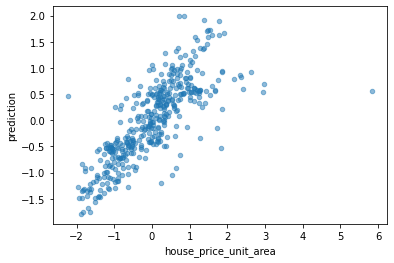

In [ ]:
# -- your code here
sns.scatterplot(y.reshape(1, -1)[0], model.predict(x).reshape(1, -1)[0], alpha=0.6)
plt.xlabel('house_price_unit_area')
plt.ylabel('prediction')
plt.show()